# Merge Tuolumne (Gaylor Pit) files together

Read in our Gaylor Pit data files and merge together

In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import xarray as xr
import glob

import matplotlib.pyplot as plt
%matplotlib inline

---
#### Open Tuolumne (Gaylor Pit) data files:

In [2]:
# 2017, and data cleanup
tuolumne_gaylor_pit_2017 = pd.read_csv('data/tuolumne_gaylor_pit/GaylorPit2017_039_T15min.csv')
tuolumne_gaylor_pit_2017.rename(columns={'TIMESTAMP':'time', 'TT_C': 'tss'}, inplace=True)
tuolumne_gaylor_pit_2017['time'] = pd.to_datetime(tuolumne_gaylor_pit_2017.time)
tuolumne_gaylor_pit_2017.set_index('time', inplace=True)
tuolumne_gaylor_pit_2017['air_temp_c'] = (tuolumne_gaylor_pit_2017.Judd_Air_TempF- 32) / 1.8
tuolumne_gaylor_pit_2017['depth_cm'] = tuolumne_gaylor_pit_2017.Judd_Depth_in * 2.54
#tuolumne_gaylor_pit_2017.head()

In [3]:
# 2018, and data cleanup
tuolumne_gaylor_pit_2018 = pd.read_csv('data/tuolumne_gaylor_pit/GaylorPit2018_039_T15min.csv', sep='\t', skiprows=[0])
tuolumne_gaylor_pit_2018.rename(columns={'TIMESTAMP [TS]':'time', 'TT_C [Deg C]': 'tss'}, inplace=True)
tuolumne_gaylor_pit_2018['time'] = pd.to_datetime(tuolumne_gaylor_pit_2018.time)
tuolumne_gaylor_pit_2018.set_index('time', inplace=True)
tuolumne_gaylor_pit_2018['air_temp_c'] = (tuolumne_gaylor_pit_2018['Judd_Air_TempF [Deg F]']- 32) / 1.8
tuolumne_gaylor_pit_2018['depth_cm'] = tuolumne_gaylor_pit_2018['Judd_Depth [Inches]'] * 2.54
#tuolumne_gaylor_pit_2018.head()

In [4]:
# 2019, and data cleanup
tuolumne_gaylor_pit_2019 = pd.read_csv('data/tuolumne_gaylor_pit/GaylorPit2019_039_T15min.csv')
tuolumne_gaylor_pit_2019.rename(columns={'TIMESTAMP':'time', 'TT_C': 'tss'}, inplace=True)
tuolumne_gaylor_pit_2019['time'] = pd.to_datetime(tuolumne_gaylor_pit_2019.time)
tuolumne_gaylor_pit_2019.set_index('time', inplace=True)
tuolumne_gaylor_pit_2019['air_temp_c'] = (tuolumne_gaylor_pit_2019['Judd_Air_TempF']- 32) / 1.8
tuolumne_gaylor_pit_2019['depth_cm'] = tuolumne_gaylor_pit_2019['Judd_Depth [inches]'] * 2.54
#tuolumne_gaylor_pit_2019.head()

In [5]:
# 2020, and cleanup
tuolumne_gaylor_pit_2020 = pd.read_csv('data/tuolumne_gaylor_pit/GaylorPit2020_039_T15min.csv')
tuolumne_gaylor_pit_2020.rename(columns={'TIMESTAMP':'time'}, inplace=True)
tuolumne_gaylor_pit_2020['tss'] = pd.to_numeric(tuolumne_gaylor_pit_2020.TT_C, errors='coerce')
tuolumne_gaylor_pit_2020['time'] = pd.to_datetime(tuolumne_gaylor_pit_2020.time)
tuolumne_gaylor_pit_2020.set_index('time', inplace=True)
tuolumne_gaylor_pit_2020['air_temp_c'] = (tuolumne_gaylor_pit_2020['Judd_Air_TempF']- 32) / 1.8
tuolumne_gaylor_pit_2020['depth_cm'] = tuolumne_gaylor_pit_2020['Judd_Depth [inches]'] * 2.54
#tuolumne_gaylor_pit_2020.head()

/home/spestana/opt/anaconda3/envs/goes-linux/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Drop columns we don't need. (Also, 2018's data is also contained in the 2019 file, so we can ignore the separate 2018 file here)

In [6]:
_tuolumne_gaylor_pit_2017 = tuolumne_gaylor_pit_2017.drop(['RECORD', 'BattV', 'PTemp_C', 'SBT_C', 'Judd_Air_TempF', 'Judd_Depth_in'], axis=1)
_tuolumne_gaylor_pit_2019 = tuolumne_gaylor_pit_2019.drop(['RECORD', 'BattV', 'PTemp_C', 'SBT_C', 'Judd_Air_TempF', 'Judd_Depth [inches]', 'SlrkW_up [kW/m^2]', 'SlrkW_dwn [kW/m^2]','WindSpeed [mph]', 'WindDirection'], axis=1)
_tuolumne_gaylor_pit_2020 = tuolumne_gaylor_pit_2020.drop(['RECORD', 'BattV', 'PTemp_C', 'TT_C', 'SBT_C', 'Judd_Air_TempF','Judd_Depth [inches]', 'SlrkW_up [kW/m^2]', 'SlrkW_dwn [kW/m^2]','WindSpeed [mph]', 'WindDirection'], axis=1)

Concatenate the dataframes together into one. Then Convert to xarray data array.

In [7]:
tuol_df = pd.concat([_tuolumne_gaylor_pit_2017, _tuolumne_gaylor_pit_2019, _tuolumne_gaylor_pit_2020])
# sortby index
tuol_df.sort_index(inplace=True)
# save out to a file
tuol_df.to_pickle('data/GaylorPit_Temp_Snowdepth_2017-2020.pkl')

In [8]:
tuol_df

,tss,air_temp_c,depth_cm
time,,,
2015-09-29 10:00:00,16.93,14.405556,144.62760
2015-09-29 10:15:00,17.17,14.811111,1.84912
2015-09-29 10:30:00,19.73,15.888889,2.01676
2015-09-29 10:45:00,22.59,16.900000,0.83820
2015-09-29 11:00:00,25.51,17.911111,0.50292
...,...,...,...
2020-08-20 12:30:00,44.02,23.533333,-1.71704
2020-08-20 12:45:00,42.58,22.055556,1.14046
2020-08-20 13:00:00,43.37,23.000000,0.97282


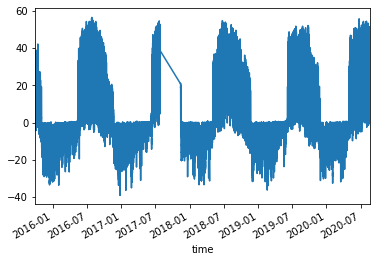

In [9]:
tuol_df.tss.plot()